In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#Read the csv file that was created by jason for the further use 
final_df = pd.read_csv("Data Frames/complete_top_200_movies.csv")
final_df

,Title,Lifetime Gross,Year,Title.1,Year.1,Rated,Released,Runtime,Genre,Director,...,Plot,Language,Country,Awards,Ratings,Metascore,imdbRating,imdbVotes,DVD,BoxOffice
0,Avatar,2923706026,2009,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,...,A paraplegic Marine dispatched to the moon Pan...,"English, Spanish",United States,Won 3 Oscars. 91 wins & 131 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",83.0,7.9,"1,384,939",10 Feb 2016,"$785,221,649"
1,Avengers: Endgame,2799439100,2019,Avengers: Endgame,2019,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama","Anthony Russo, Joe Russo",...,After the devastating events of Avengers: Infi...,"English, Japanese, Xhosa, German",United States,Nominated for 1 Oscar. 70 wins & 133 nominatio...,"[{'Source': 'Internet Movie Database', 'Value'...",78.0,8.4,"1,264,820",30 Jul 2019,"$858,373,000"
2,Avatar: The Way of Water,2320250281,2022,Avatar: The Way of Water,2022,PG-13,16 Dec 2022,192 min,"Action, Adventure, Fantasy",James Cameron,...,Jake Sully lives with his newfound family form...,English,United States,Won 1 Oscar. 75 wins & 150 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",67.0,7.6,"488,471",28 Mar 2023,"$684,075,767"
3,Titanic,2264750694,1997,Titanic,1997,PG-13,19 Dec 1997,194 min,"Drama, Romance",James Cameron,...,A seventeen-year-old aristocrat falls in love ...,"English, Swedish, Italian, French","United States, Mexico",Won 11 Oscars. 126 wins & 83 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",75.0,7.9,"1,280,439",01 Jun 2014,"$674,292,608"
4,Star Wars: Episode VII - The Force Awakens,2071310218,2015,Star Wars: Episode VII - The Force Awakens,2015,PG-13,18 Dec 2015,138 min,"Action, Adventure, Sci-Fi",J.J. Abrams,...,"As a new threat to the galaxy rises, Rey, a de...",English,United States,Nominated for 5 Oscars. 64 wins & 140 nominati...,"[{'Source': 'Internet Movie Database', 'Value'...",80.0,7.8,"973,458",01 Apr 2016,"$936,662,225"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Night at the Museum,574482479,2006,Night at the Museum,2006,PG,22 Dec 2006,108 min,"Adventure, Comedy, Family",Shawn Levy,...,A newly recruited night security guard at the ...,"English, Italian, Hebrew","United States, United Kingdom",2 wins & 8 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",48.0,6.5,"375,625",31 Oct 2015,"$250,863,268"
196,Fifty Shades of Grey,569651467,2015,Fifty Shades of Grey,2015,R,13 Feb 2015,125 min,"Drama, Romance, Thriller",Sam Taylor-Johnson,...,Literature student Anastasia Steele's life cha...,English,United States,Nominated for 1 Oscar. 9 wins & 30 nominations...,"[{'Source': 'Internet Movie Database', 'Value'...",46.0,4.2,"335,526",05 Jan 2016,"$166,167,230"
197,The Little Mermaid,569626289,2023,The Little Mermaid,1989,G,17 Nov 1989,83 min,"Animation, Adventure, Family","Ron Clements, John Musker",...,A mermaid princess makes a Faustian bargain in...,"English, French",United States,Won 2 Oscars. 16 wins & 8 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",88.0,7.6,"290,847",21 May 2017,"$111,543,479"
198,Kong: Skull Island,568652812,2017,Kong: Skull Island,2017,PG-13,10 Mar 2017,118 min,"Action, Adventure, Fantasy",Jordan Vogt-Roberts,...,"After the Vietnam war, a team of scientists ex...","English, Vietnamese, Japanese","United States, China",Nominated for 1 Oscar. 1 win & 22 nominations ...,"[{'Source': 'Internet Movie Database', 'Value'...",62.0,6.7,"346,141",05 Jun 2017,"$168,052,812"


In [5]:
actors_columns = ["Title", "Lifetime Gross", "Actors"] #Create a copy of the DF to only use the 3 columns in the braces mentioned 
actors_df = final_df[actors_columns].copy()

# separate the actors so that there is only one actor for each line and add them back to the dataframe 
actors_df["Actors"] = final_df["Actors"].str.split(",") 
actors_df = actors_df.explode("Actors")

actors_df.head()

,Title,Lifetime Gross,Actors
0,Avatar,2923706026,Sam Worthington
0,Avatar,2923706026,Zoe Saldana
0,Avatar,2923706026,Sigourney Weaver
1,Avengers: Endgame,2799439100,Robert Downey Jr.
1,Avengers: Endgame,2799439100,Chris Evans


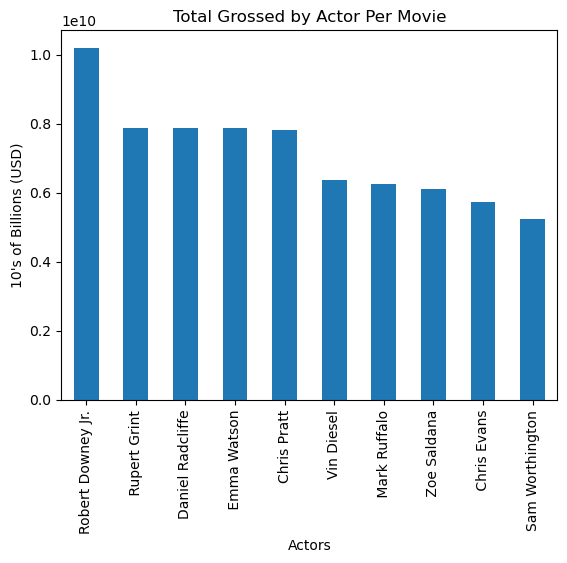

In [6]:
#group the actors and find the mean for each movie they are in 
actors_grouped_df = actors_df.groupby("Actors")["Lifetime Gross"].sum()
top_10_actors = actors_grouped_df.sort_values(ascending=False).head(10)#sort the actors so that we can find the total amount made by each actor per movie 

#plot onto a bar graph for visualization 
top_10_actors.plot(kind="bar")
plt.ylabel("10's of Billions (USD)")
plt.title("Total Grossed by Actor Per Movie")
plt.show()

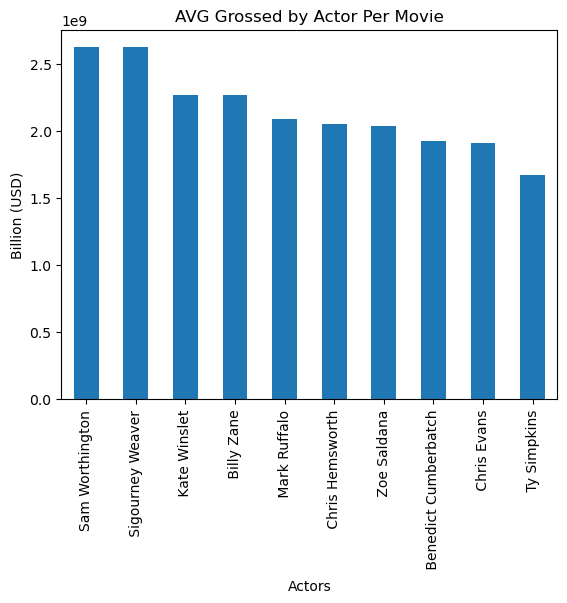

In [7]:
#group the actors and find the mean for each movie they are in 
actors_grouped_df = actors_df.groupby("Actors")["Lifetime Gross"].mean()
top_10_actors = actors_grouped_df.sort_values(ascending=False).head(10)#sort the actors so that we can find the avg amount made by each actor per movie 

#plot onto a bar graph for visualization 
top_10_actors.plot(kind="bar")
plt.ylabel("Billion (USD)")
plt.title("AVG Grossed by Actor Per Movie")
plt.show()

In [8]:
director_columns = ["Title", "Lifetime Gross", "Director"] #Create a copy of the DF to only use the 3 columns in the braces mentioned
director_df = final_df[director_columns].copy()

# separate the directors so that there is only one director for each line and add them back to the dataframe 
director_df["Director"] = director_df["Director"].str.split(",") 
director_df = director_df.explode("Director")

director_df.head()

,Title,Lifetime Gross,Director
0,Avatar,2923706026,James Cameron
1,Avengers: Endgame,2799439100,Anthony Russo
1,Avengers: Endgame,2799439100,Joe Russo
2,Avatar: The Way of Water,2320250281,James Cameron
3,Titanic,2264750694,James Cameron


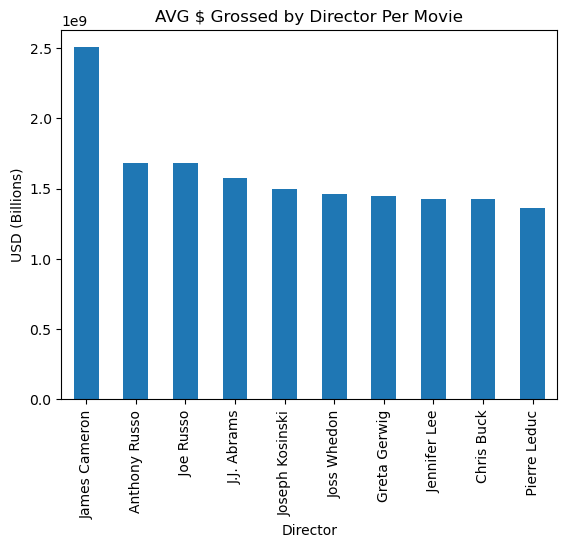

In [9]:
#group the directors and find the mean for each movie they are in 
directors_grouped_df = director_df.groupby("Director")["Lifetime Gross"].mean()
top_10_directors = directors_grouped_df.sort_values(ascending=False).head(10)#sort the directors so that we can find the avg amount made by each director per movie 

#plot onto a bar graph for visualization 
top_10_directors.plot(kind="bar")
plt.ylabel("USD (Billions)")
plt.title("AVG $ Grossed by Director Per Movie")
plt.show()


In [10]:
rating_columns = ["Title", "Lifetime Gross", "Rated"] #Create a copy of the DF to only use the 3 columns in the braces mentioned
rating_df = final_df[rating_columns].copy()
rating_df.head()

,Title,Lifetime Gross,Rated
0,Avatar,2923706026,PG-13
1,Avengers: Endgame,2799439100,PG-13
2,Avatar: The Way of Water,2320250281,PG-13
3,Titanic,2264750694,PG-13
4,Star Wars: Episode VII - The Force Awakens,2071310218,PG-13


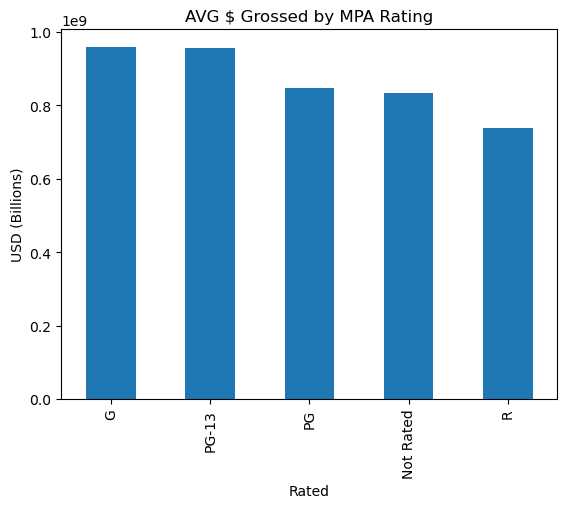

In [11]:
#group the ratings and find the mean for each movie they are in 
rating_grouped_df = rating_df.groupby("Rated")["Lifetime Gross"].mean()
sorted_ratings_df = rating_grouped_df.sort_values(ascending=False).head()#sort the ratings so that we can find the avg amount each rating per movie 

#plot onto a bar graph for visualization 
sorted_ratings_df.plot(kind="bar")
plt.ylabel("USD (Billions)")
plt.title("AVG $ Grossed by MPA Rating")
plt.show()


In [12]:
writers_columns = ["Title", "Lifetime Gross", "Writer"] #Create a copy of the DF to only use the 3 columns in the braces mentioned
Writers_df = final_df[writers_columns].copy()

# separate the writers so that there is only one writer for each line and add them back to the dataframe 
Writers_df["Writer"] = Writers_df["Writer"].str.split(",")
Writers_df = Writers_df.explode("Writer")

Writers_df.head()

,Title,Lifetime Gross,Writer
0,Avatar,2923706026,James Cameron
1,Avengers: Endgame,2799439100,Christopher Markus
1,Avengers: Endgame,2799439100,Stephen McFeely
1,Avengers: Endgame,2799439100,Stan Lee
2,Avatar: The Way of Water,2320250281,James Cameron


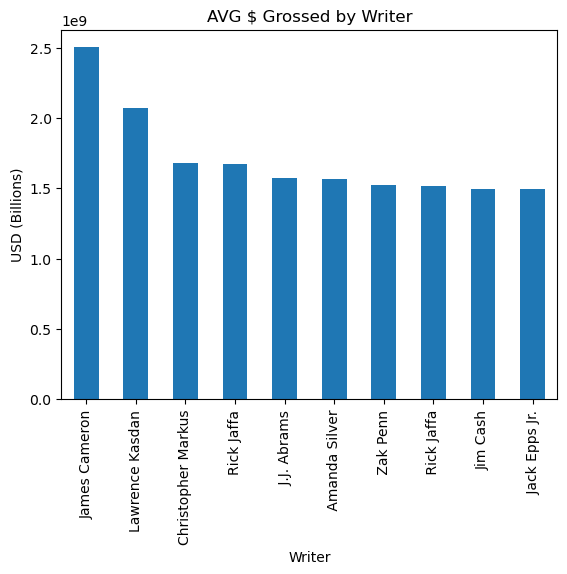

In [13]:
#group the writers and find the mean for each movie they are in 
writers_grouped_df = Writers_df.groupby("Writer")["Lifetime Gross"].mean()
top_10_writers = writers_grouped_df.sort_values(ascending=False).head(10)#sort the writers so that we can find the avg amount made by each writer per movie 

#plot onto a bar graph for visualization 
top_10_writers.plot(kind="bar")
plt.ylabel("USD (Billions)")
plt.title("AVG $ Grossed by Writer")
plt.show()

In [14]:
genres_columns = ["Title", "Lifetime Gross", "Genre"] #Create a copy of the DF to only use the 3 columns in the braces mentioned
genres_df = final_df[genres_columns].copy()

# separate the genres so that there is only one genre for each line and add them back to the dataframe 
genres_df["Genre"] = genres_df["Genre"].str.split(",")
genres_df = genres_df.explode("Genre")

genres_df.head()

,Title,Lifetime Gross,Genre
0,Avatar,2923706026,Action
0,Avatar,2923706026,Adventure
0,Avatar,2923706026,Fantasy
1,Avengers: Endgame,2799439100,Action
1,Avengers: Endgame,2799439100,Adventure


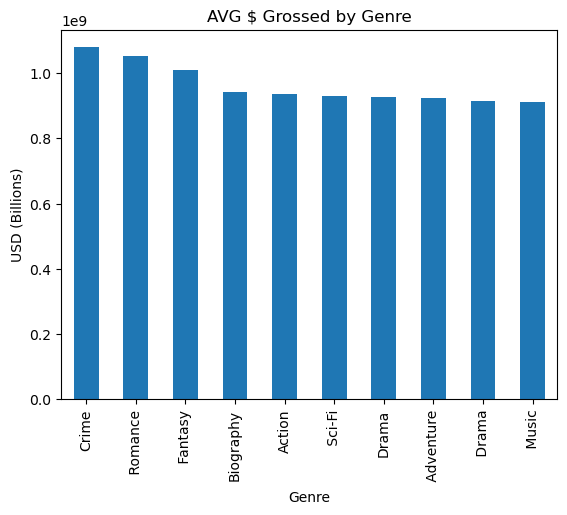

In [15]:
#group the genres and find the mean for each movie they are in 
genres_grouped_df = genres_df.groupby("Genre")["Lifetime Gross"].mean()
top_10_genres = genres_grouped_df.sort_values(ascending=False).head(10)#sort the genres so that we can find the avg amount each genre made per movie 

#plot onto a bar graph for visualization 
top_10_genres.plot(kind="bar")
plt.ylabel("USD (Billions)")
plt.title("AVG $ Grossed by Genre")
plt.show()